In [68]:
# import sys
# !{sys.executable} -m pip install -r requirements.txt
# # !python --version
# # !python -m pip install -r requirements.txt
# print("requirements installed \n running program...")

In [69]:
import sys
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import matplotlib as plt

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns 

windows_dir = "../kaggle/all/"
ubuntu_dir = "/home/prof/kaggle/unbankedcredit/kaggle/all/"

import platform

system = platform.system()

print("Notebook is running on operating system: {}".format(system))
if system == "Linux":
    directory = ubuntu_dir
else:
    directory = windows_dir

Notebook is running on operating system: Linux


In [70]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [71]:
# Training data
train_file = "/home/prof/kaggle/unbankedcredit/train_enhanced.csv"
train_pd = pd.read_csv(train_file)
print('Training data shape: ', train_pd.shape)
train_pd.head()

Training data shape:  (307511, 245)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,EXT_SOURCE_1_2_3_PRODUCT,EXT_SOURCE_1_3_PRODUCT,EXT_SOURCE_1_3_ADD,INCOME_RATIO,TOTAL_OUTSTANDING_DEBT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,1,0,1,False,0.003043,0.011573,0.222413,2.007889,245781.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,1,0,0,False,NaN,NaN,NaN,4.790750,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,False,NaN,NaN,NaN,2.000000,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,False,NaN,NaN,NaN,2.316167,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,False,NaN,NaN,NaN,4.222222,0.0


In [72]:
# Test data
test_file = "/home/prof/kaggle/unbankedcredit/test_enhanced.csv"
test_pd = pd.read_csv(test_file)
print('Training data shape: ', test_pd.shape)
test_pd.head()

Training data shape:  (48744, 244)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,EXT_SOURCE_1_2_3_PRODUCT,EXT_SOURCE_1_3_PRODUCT,EXT_SOURCE_1_3_ADD,INCOME_RATIO,TOTAL_OUTSTANDING_DEBT
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,1,0,1,0,False,0.094803,0.120057,0.912134,4.213333,596686.5
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,False,0.071345,0.244619,0.997952,2.250182,568408.5
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,False,NaN,NaN,NaN,3.275378,0.0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,1,0,False,0.164177,0.322119,1.138438,5.000000,186304.5
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,False,NaN,NaN,NaN,3.475000,NaN


In [73]:
# train_data = train_pd[['SK_ID_CURR','AMT_INCOME_TOTAL', 'TARGET', 'EXT_SOURCE_1_2_3_PRODUCT', 'TOTAL_OUTSTANDING_DEBT' ]]
train_data = train_pd

In [74]:
# test_data = test_pd[['SK_ID_CURR','AMT_INCOME_TOTAL', 'EXT_SOURCE_1_2_3_PRODUCT', 'TOTAL_OUTSTANDING_DEBT' ]]
test_data = test_pd

In [75]:
features = 0
for c in train_data:
    features +=1
print("number of features is {}".format(features))

number of features is 245


In [76]:
# from sklearn import preprocessing 
# Y_imputed=preprocessing.Imputer().fit_transform(test_data) 
# Y_imputed.shape

In [77]:
from sklearn.preprocessing import MinMaxScaler, Imputer

train_labels = train_data['TARGET']

# Drop the target from the training data
if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    
# Feature names
features = list(train_data.columns)

# Copy of the testing data
test = test_data.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train_model = imputer.transform(train)
test_model = imputer.transform(test)


# Repeat with the scaler
scaler.fit(train_model)
s_train = scaler.transform(train_model)
s_test = scaler.transform(test_model)

print('Training data shape: ', s_train.shape)
print('Testing data shape: ', s_test.shape)

Training data shape:  (307511, 244)
Testing data shape:  (48744, 244)


In [78]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, class_weight="balanced") # balancing class weights as highly unbalanced

# Train on the training data
log_reg.fit(s_train, train_labels)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [79]:
log_reg.score(s_train, train_labels)

0.6574203849618387

In [80]:
# Make predictions
# Make sure to select the second column only
log_reg_train_pred = log_reg.predict(s_train)


Confusion matrix, without normalization
[[185705  96981]
 [  8366  16459]]
Normalized confusion matrix
[[0.66 0.34]
 [0.34 0.66]]


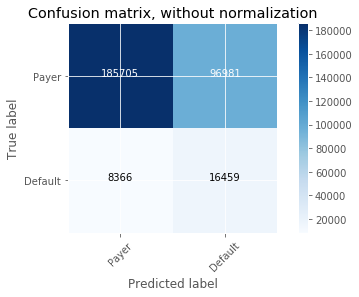

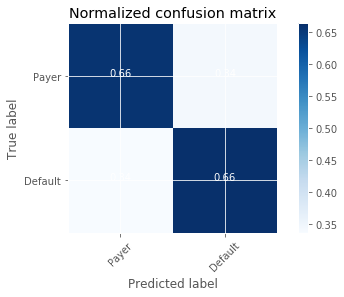

In [81]:
class_names = ["Payer", "Default"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(train_labels,log_reg_train_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

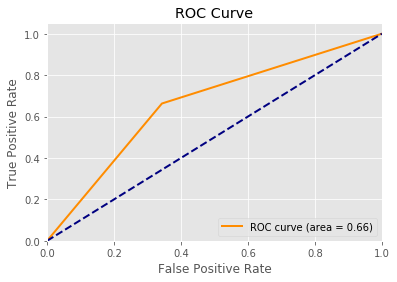

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# y_predict_probabilities = clf.predict(X_test)[:,1]

fpr, tpr, _ = roc_curve(train_labels, log_reg_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [83]:
log_reg_pred = log_reg.predict_proba(s_test)[:, 1]

In [84]:
# Submission dataframe
submit = test_data[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
submit

,SK_ID_CURR,TARGET
0,100001,0.413721
1,100005,0.641151
2,100013,0.371893
3,100028,0.420809
4,100038,0.605789
5,100042,0.311821
6,100057,0.395039
7,100065,0.561659
8,100066,0.258081
9,100067,0.542851


In [86]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline_with_credit_prodcut.csv', index = False)

In [87]:
X = train_model # training data without scaler
y = train_labels

In [88]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC(random_state=0)
clf.fit(X, y)
LinearSVC(C = 0.0001, class_weight="balanced", dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1000, tol=0.0001,
     verbose=0)
# print(clf.coef_)
# print(clf.intercept_)



LinearSVC(C=0.0001, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1000, tol=0.0001,
     verbose=0)

In [89]:
clf.score(X,y)

0.8535564581429608

In [90]:
predictions = clf.decision_function(s_test)

In [91]:
predict = clf.predict(X)

Confusion matrix, without normalization
[[260928  21758]
 [ 23275   1550]]
Normalized confusion matrix
[[0.92 0.08]
 [0.94 0.06]]


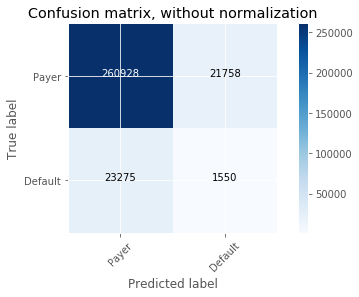

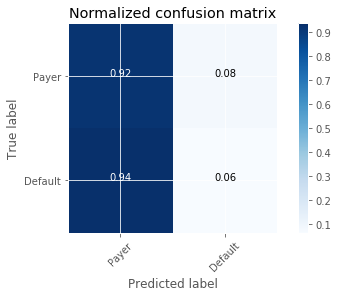

In [92]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y,predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ROC Curve

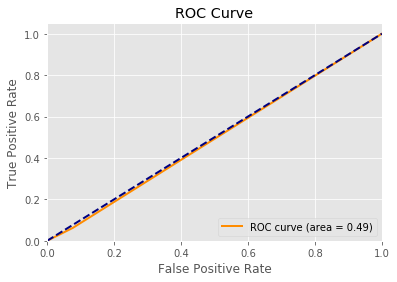

In [93]:
# y_predict_probabilities = clf.predict(X_test)[:,1]

fpr, tpr, _ = roc_curve(y, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [94]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

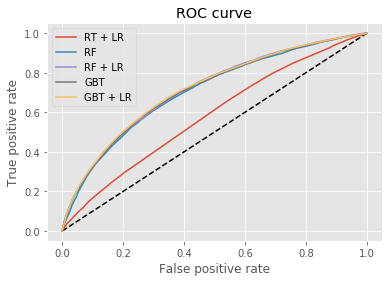

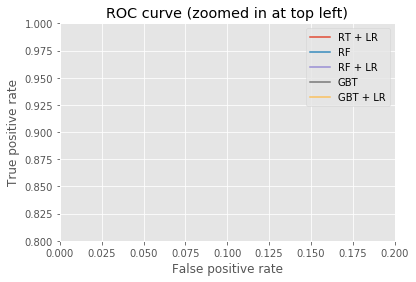

In [95]:

import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()


In [99]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics



In [101]:
submission, fi, metrics = model(train_data, test_data)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.756076	train's auc: 0.800832
Early stopping, best iteration is:
[225]	valid's auc: 0.756323	train's auc: 0.804878
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.759363	train's auc: 0.801165
Early stopping, best iteration is:
[219]	valid's auc: 0.75942	train's auc: 0.804517
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.764184	train's auc: 0.799823
[400]	valid's auc: 0.764084	train's auc: 0.830631
Early stopping, best iteration is:
[316]	valid's auc: 0.764496	train's auc: 0.818583
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.759328	train's auc: 0.800764
Early stopping, best iteration is:
[238]	valid's auc: 0.759622	train's auc: 0.807281
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.75936

In [102]:
submission.to_csv('baseline_lgb.csv', index = False)

ValueError: Found input variables with inconsistent numbers of samples: [307511, 48744]